

# Project: Investigate a Dataset (No_show_appointments_Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


importing statements for all of the packages

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading file

df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Data summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning(Checking the data)

In [4]:
#Check for empty slots
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#checking sample data and columns names
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#Checking the info
df.info()

# Check for dublicate.
print("Duplicates : ", + sum(df.duplicated()))

#Check age column for negative values
df[df["Age"]<=0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
Duplicates :  0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


Cleaning the data and fixing typos

In [7]:
df.rename(columns= {"Hipertension" : "Hypertension","Handcap" : "Handicap","No-show":"NoShow"}, inplace= True)

Fixing date time formate

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [9]:
#Re-Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  NoShow        

Adjusting unlogic ages 

In [10]:
#logically should no patient has age =<0
#determining the mean value
MeanAge=df['Age'].mean()


In [11]:
#excuting to the dataset 
df[df['Age'] <=0] = MeanAge

In [12]:
#checking the results
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
NoShow            0
dtype: int64

converting the (yes/No) in No Show column to logical numbers for graphing.

In [13]:
df.NoShow[df['NoShow'] == 'Yes'] = "1"
df.NoShow[df['NoShow'] == 'No'] = "0"
df["NoShow"] = pd.to_numeric(df['NoShow'])

C:\Users\ahmed\AppData\Local\Temp\ipykernel_16028\606932315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.NoShow[df['NoShow'] == 'Yes'] = "1"
C:\Users\ahmed\AppData\Local\Temp\ipykernel_16028\606932315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.NoShow[df['NoShow'] == 'No'] = "0"


After creating some random graphs and charts and returning back to raw data, some typo/ outliners(37.088874211731) have been found hence, accordinly they should be removed to avoid misleading reasults(Bias).

In [14]:
df.Gender.unique()

array(['F', 'M', 37.08887421173107], dtype=object)

In [15]:
#drop the rows that has this invalid data enteries
df = df[df.Gender != 37.08887421173107 ]
df.Gender.unique()

array(['F', 'M'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (appointments show-up and no  show-up rates)

In [16]:
#creating a mask for people showed up
showed = df['NoShow'] == 0
not_showed = df['NoShow'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

20.26414424182377


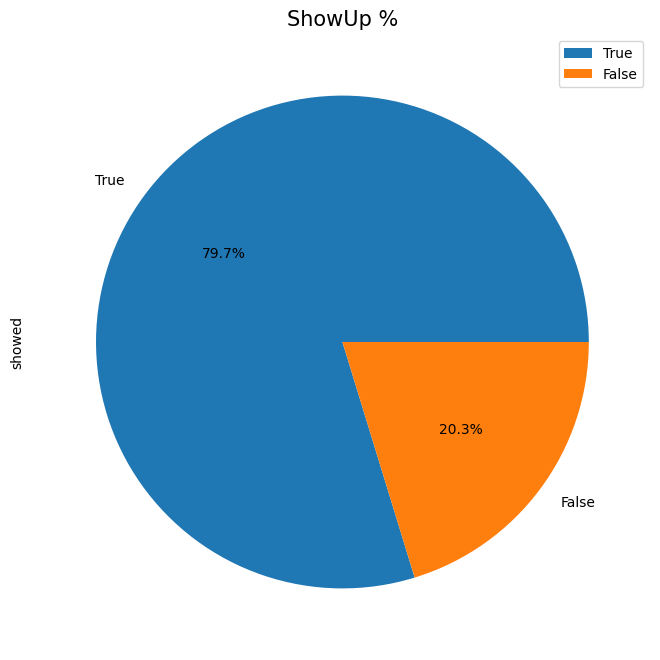

In [17]:
#percentage of showed/not showed up people (pie chart)
showedPeop = df['showed'].value_counts()
print(showedPeop[1] / showedPeop.sum() * 100)
pieChart = showedPeop.plot.pie(figsize=(8,8),fontsize=10,autopct='%1.1f%%');
pieChart.set_title("ShowUp %", fontsize=15);
plt.legend();



### Research Question 2  (What is the most variable common with patients showing up)

In [18]:
#taking a look at the Raw Data sample
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,showed,not_showed
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True,False


In [19]:
df.Age[not_showed].mean()

35.329151291512915

In [20]:
df.Age[showed].mean()

39.07518726482

relation between (age, alcoholic people, SMS recivers , Gender,Scholarship) and the showed up people

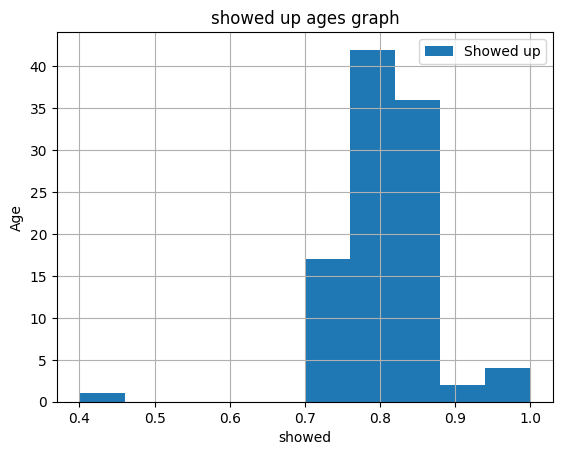

In [21]:
#Visualizng average people who showed up

df.groupby('Age')['showed'].mean().hist(label='Showed up')
plt.xlabel('showed')
plt.ylabel('Age')
plt.title("showed up ages graph")
plt.legend()

In [22]:

#Saving a new cleaned copy.

df.to_csv('Check.csv')

In [23]:
#defining graphing function

def myGroPlot(df, grpVar, yVar=None,xlabel=None, color='steelblue',title=None, ylabel=None, rotation=None, figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    #data
    print(df.groupby(grpVar)[yVar].mean())
    # plotting
    df.groupby(grpVar)[yVar].mean().plot(kind='bar',label='Showed up',edgecolor='black',)
    plt.title(f' {title}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(xlabel.title())
    plt.ylabel(f'{ylabel}'.title())
    plt.xticks(rotation=rotation)
    plt.grid(axis='y')


Alcoholism
0.0    0.797321
1.0    0.798512
Name: showed, dtype: float64


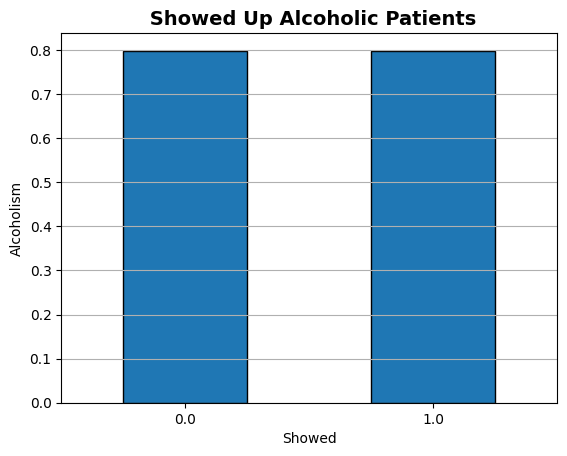

In [24]:
#relation bewteen people who showed up and Alcoholism
myGroPlot(df=pd.read_csv('Check.csv'),grpVar='Alcoholism',yVar='showed',xlabel='showed',ylabel='Alcoholism',title='showed up Alcoholic patients')


Relation between other featrues:

SMS_received
0.0    0.832712
1.0    0.723348
Name: showed, dtype: float64


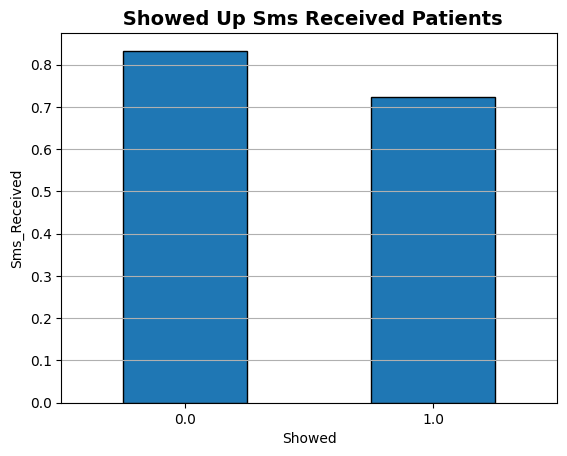

In [25]:

#relation bewteen people who showed up and SMS_received

myGroPlot(df=pd.read_csv('Check.csv'),grpVar='SMS_received',yVar='showed',xlabel='showed',ylabel='SMS_received',title='showed up SMS received patients')

Gender
F    0.796415
M    0.799154
Name: showed, dtype: float64


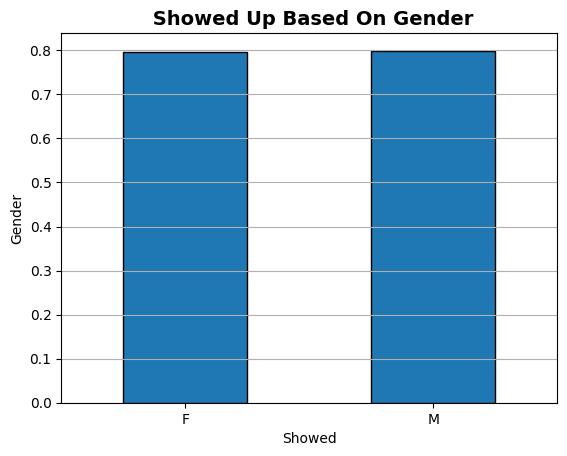

In [26]:
#relation bewteen people who showed up and Gender

myGroPlot(df=pd.read_csv('Check.csv'),grpVar='Gender',yVar='showed',xlabel='showed',ylabel='Gender',title='showed up based on Gender')

Scholarship
0.0    0.801316
1.0    0.762143
Name: showed, dtype: float64


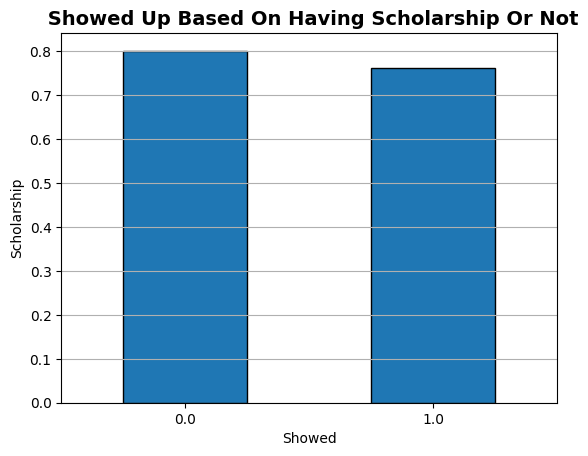

In [27]:
#relation bewteen people who showed up based on having Scholarship or not

myGroPlot(df=pd.read_csv('Check.csv'),grpVar='Scholarship',yVar='showed',xlabel='showed',ylabel='Scholarship',title='showed up based on having Scholarship or not')

<a id='conclusions'></a>
## Conclusions

It is clear from that charts that; About 20.3% of the people that schedule an appointment did not mkae it to their appointment.

The Age is the most important factor in our investagtion as you can see the average age of people who will be most likely to come is 39.07519 and the average age of people who are not likely to come is 35.329

there is no relation nor correlation between alchol and showing up.

Sending SMS for the appointment is not neccessary the right option to decide upon.

Also Gender doen't show any relations to showing up or not.


most of people who has scholarship are more likely to miss thier appointments with percentage 76.2% of showing up.


<a id='Limitations'></a>



<a id='Limitations'></a>
## Limitations

Some features maybe more insightful as do the patient has series illness or not, medical insurance available or not... etc